## 词典资源
词典(`Lexical`)或词典资源是一个词和/或短语及其相关信息的集合，例如：词性(`part-of-speech`)和词意(`sense`)定义等相关信息。

图2-5中描述了词汇相关的标准术语。词项(`lexical entry`)包括词目(`headword`)（也叫词条(`lemma`)）及其他附加信息，例如：词性和词意定义。两个含义不同但拼写相同的分词被称为同音异义词(`homonyms`)。

![2-5](https://www.safaribooksonline.com/library/view/natural-language-processing/9780596803346/httpatomoreillycomsourceoreillyimages302024.png)

Figure 2-5. Lexicon terminology: Lexical entries for two lemmas having the same spelling (homonyms), providing part-of-speech and gloss information.

### 词汇列表语料库
过滤文本：此程序计算文本的词汇表，然后删除所有在现有的词汇列表中出现的元素，只留下罕见的或拼写错误的词汇。

In [15]:
%matplotlib inline

In [2]:
import nltk

def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:30]

[u'abbeyland',
 u'abhorred',
 u'abilities',
 u'abounded',
 u'abridgement',
 u'abused',
 u'abuses',
 u'accents',
 u'accepting',
 u'accommodations',
 u'accompanied',
 u'accounted',
 u'accounts',
 u'accustomary',
 u'aches',
 u'acknowledging',
 u'acknowledgment',
 u'acknowledgments',
 u'acquaintances',
 u'acquiesced',
 u'acquitted',
 u'acquitting',
 u'acted',
 u'actions',
 u'adapted',
 u'adding',
 u'additions',
 u'addressed',
 u'addresses',
 u'addressing']

In [3]:
unusual_words(nltk.corpus.nps_chat.words())[:30]

[u'aaaaaaaaaaaaaaaaa',
 u'aaahhhh',
 u'abortions',
 u'abou',
 u'abourted',
 u'abs',
 u'ack',
 u'acros',
 u'actualy',
 u'adams',
 u'adds',
 u'adduser',
 u'adjusts',
 u'adoted',
 u'adreniline',
 u'ads',
 u'adults',
 u'afe',
 u'affairs',
 u'affari',
 u'affects',
 u'afk',
 u'agaibn',
 u'ages',
 u'aggravated',
 u'agurlwithbigguns',
 u'ahah',
 u'ahahah',
 u'ahahh',
 u'ahahha']

停用词(`stopwords`)语料库：

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')[:30]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what']

定义一个函数来计算文本中不包含在停用词表中的词所占的比例。

In [10]:
from __future__ import division

def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

在停用词的帮助下，筛选掉文本中三分之一的词。

词谜。检查必须出现的字母（2）和长度限制（1）（这里只查找6个或6个以上字母的词）。利用FreqDist比较法（3）检查候选词中的每个字母出现的频率是否小于或等于其相应在词谜中出现的频率。

In [11]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 #1
                        and obligatory in w #2
                        and nltk.FreqDist(w) <= puzzle_letters] #3

[u'glover',
 u'gorlin',
 u'govern',
 u'grovel',
 u'ignore',
 u'involver',
 u'lienor',
 u'linger',
 u'longer',
 u'lovering',
 u'noiler',
 u'overling',
 u'region',
 u'renvoi',
 u'revolving',
 u'ringle',
 u'roving',
 u'violer',
 u'virole']

![2-6](https://www.safaribooksonline.com/library/view/natural-language-processing/9780596803346/httpatomoreillycomsourceoreillyimages302026.png)

Figure 2-6. A word puzzle: A grid of randomly chosen letters with rules for creating words out of the letters; this puzzle is known as “Target.”

名字语料库。基于名字尾字母的男性/女性统计。

In [12]:
names = nltk.corpus.names
names.fileids()

[u'female.txt', u'male.txt']

In [14]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names][:30cfd = nltk.ConditionalFreqDist(]

[u'Abbey',
 u'Abbie',
 u'Abby',
 u'Addie',
 u'Adrian',
 u'Adrien',
 u'Ajay',
 u'Alex',
 u'Alexis',
 u'Alfie',
 u'Ali',
 u'Alix',
 u'Allie',
 u'Allyn',
 u'Andie',
 u'Andrea',
 u'Andy',
 u'Angel',
 u'Angie',
 u'Ariel',
 u'Ashley',
 u'Aubrey',
 u'Augustine',
 u'Austin',
 u'Averil',
 u'Barrie',
 u'Barry',
 u'Beau',
 u'Bennie',
 u'Benny']

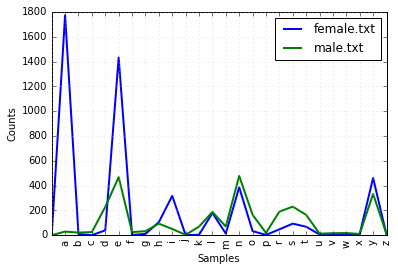

In [16]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

Figure 2-7. Conditional frequency distribution: This plot shows the number of female and male names ending with each letter of the alphabet; most names ending with a, e, or i are female; names ending in h and l are equally likely to be male or female; names ending in k, o, r, s, and t are likely to be male.

### 发音的词典
美国英语的CMU发音词典。

In [17]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [18]:
for entry in entries[39943:39951]:
    print entry

(u'explorer', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0'])
(u'explorers', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0', u'Z'])
(u'explores', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'Z'])
(u'exploring', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'IH0', u'NG'])
(u'explosion', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N'])
(u'explosions', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N', u'Z'])
(u'explosive', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V'])
(u'explosively', [u'EH2', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V', u'L', u'IY0'])


对任意一个词，词典资源都有语音的代码——不同的声音有着不同的标签——称作音素(`phones`)。

扫描词典中发音包含三个音素的条目。

In [19]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print word, ph2,

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1


找到所有发音结尾与nicks相似的词汇。通过此方法也可以找到押韵的词。

In [20]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

[u"atlantic's",
 u'audiotronics',
 u'avionics',
 u'beatniks',
 u'calisthenics',
 u'centronics',
 u'chamonix',
 u'chetniks',
 u"clinic's",
 u'clinics',
 u'conics',
 u'conics',
 u'cryogenics',
 u'cynics',
 u'diasonics',
 u"dominic's",
 u'ebonics',
 u'electronics',
 u"electronics'",
 u"endotronics'",
 u'endotronics',
 u'enix',
 u'environics',
 u'ethnics',
 u'eugenics',
 u'fibronics',
 u'flextronics',
 u'harmonics',
 u'hispanics',
 u'histrionics',
 u'identics',
 u'ionics',
 u'kibbutzniks',
 u'lasersonics',
 u'lumonics',
 u'mannix',
 u'mechanics',
 u"mechanics'",
 u'microelectronics',
 u'minix',
 u'minnix',
 u'mnemonics',
 u'mnemonics',
 u'molonicks',
 u'mullenix',
 u'mullenix',
 u'mullinix',
 u'mulnix',
 u"munich's",
 u'nucleonics',
 u'onyx',
 u'organics',
 u"panic's",
 u'panics',
 u'penix',
 u'pennix',
 u'personics',
 u'phenix',
 u"philharmonic's",
 u'phoenix',
 u'phonics',
 u'photronics',
 u'pinnix',
 u'plantronics',
 u'pyrotechnics',
 u'refuseniks',
 u"resnick's",
 u'respironics',
 u'sc

音素包含数字表示主重音（1）、次重音（2）和无重音（0）。定义一个函数来提取重音数字，然后扫描词典，找到具有特定重音模式的词汇。

In [22]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:30]

[u'abbreviated',
 u'abbreviated',
 u'abbreviating',
 u'accelerated',
 u'accelerating',
 u'accelerator',
 u'accelerators',
 u'accentuated',
 u'accentuating',
 u'accommodated',
 u'accommodating',
 u'accommodative',
 u'accumulated',
 u'accumulating',
 u'accumulative',
 u'accumulator',
 u'accumulators',
 u'accusatory',
 u'adenovirus',
 u'adjudicated',
 u'adjudicating',
 u'administrating',
 u'administrative',
 u'administrator',
 u"administrators'",
 u"administrator's",
 u'administrators',
 u'adulterated',
 u'adventurism',
 u'adventurism']

### 比较词表
表格词典的另外一个例子是`comparative wordlist`。NLTK中包含了所谓的`Swadesh wordlists`，包括几种语言的约200个常用词的列表。

In [23]:
from nltk.corpus import swadesh
swadesh.fileids()

[u'be',
 u'bg',
 u'bs',
 u'ca',
 u'cs',
 u'cu',
 u'de',
 u'en',
 u'es',
 u'fr',
 u'hr',
 u'it',
 u'la',
 u'mk',
 u'nl',
 u'pl',
 u'pt',
 u'ro',
 u'ru',
 u'sk',
 u'sl',
 u'sr',
 u'sw',
 u'uk']

In [25]:
swadesh.words('en')[:30]

[u'I',
 u'you (singular), thou',
 u'he',
 u'we',
 u'you (plural)',
 u'they',
 u'this',
 u'that',
 u'here',
 u'there',
 u'who',
 u'what',
 u'where',
 u'when',
 u'how',
 u'not',
 u'all',
 u'many',
 u'some',
 u'few',
 u'other',
 u'one',
 u'two',
 u'three',
 u'four',
 u'five',
 u'big',
 u'long',
 u'wide',
 u'thick']

In [27]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en[:30]

[(u'je', u'I'),
 (u'tu, vous', u'you (singular), thou'),
 (u'il', u'he'),
 (u'nous', u'we'),
 (u'vous', u'you (plural)'),
 (u'ils, elles', u'they'),
 (u'ceci', u'this'),
 (u'cela', u'that'),
 (u'ici', u'here'),
 (u'l\xe0', u'there'),
 (u'qui', u'who'),
 (u'quoi', u'what'),
 (u'o\xf9', u'where'),
 (u'quand', u'when'),
 (u'comment', u'how'),
 (u'ne...pas', u'not'),
 (u'tout', u'all'),
 (u'plusieurs', u'many'),
 (u'quelques', u'some'),
 (u'peu', u'few'),
 (u'autre', u'other'),
 (u'un', u'one'),
 (u'deux', u'two'),
 (u'trois', u'three'),
 (u'quatre', u'four'),
 (u'cinq', u'five'),
 (u'grand', u'big'),
 (u'long', u'long'),
 (u'large', u'wide'),
 (u'\xe9pais', u'thick')]

In [28]:
translate = dict(fr2en)
translate['chien']

u'dog'

In [29]:
translate['jeter']

u'throw'

In [30]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

u'dog'

In [31]:
translate['perro']

u'dog'

比较德语族和拉丁语族的不同。

In [32]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print swadesh.entries(languages)[i]

(u'say', u'sagen', u'zeggen', u'decir', u'dire', u'dizer', u'dicere')
(u'sing', u'singen', u'zingen', u'cantar', u'chanter', u'cantar', u'canere')
(u'play', u'spielen', u'spelen', u'jugar', u'jouer', u'jogar, brincar', u'ludere')
(u'float', u'schweben', u'zweven', u'flotar', u'flotter', u'flutuar, boiar', u'fluctuare')


### 词汇工具：Toolbox
目前最流行的语言学家用来管理数据的工具是Toolbox。Toolbox文件由一些条目的集合组成，其中每个条目由一个或多个字段组成。

下面是Rotokas语的词典。只看第一个条目，词kaa，意思是“窒息”。

In [35]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')[1][:30]

(u'kaa',
 [(u'ps', u'V'),
  (u'pt', u'B'),
  (u'ge', u'strangle'),
  (u'tkp', u'pasim nek'),
  (u'arg', u'O'),
  (u'vx', u'2'),
  (u'dt', u'07/Oct/2006'),
  (u'ex', u'Rera rauroro rera kaarevoi.'),
  (u'xp', u'Em i holim pas em na nekim em.'),
  (u'xe', u'He is holding him and strangling him.'),
  (u'ex', u'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
  (u'xp', u'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
  (u'xe',
   u"They strangled the man's neck with rope because he was very stubborn and arrogant."),
  (u'ex',
   u'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
  (u'xp',
   u'Ol i pasim nek bilong man long rop. Olsem na em i no pulim win olsem na em i dai.'),
  (u'xe',
   u"They strangled the man's neck with a rope. And he couldn't breathe and he died.")])

条目包括一系列“属性-值”对，如('ps', 'V')，表示词性是'V'（动词），('ge', 'gag')表示英文注释是'gag'。

## WordNet
WordNet是面向语义的英语词典。

[汉语开放词网(Chinese Open WordNet)](http://openkg.cn/dataset/wordnet)
    - OpenKG收集和整理国内国外重要的开放知识库和知识图谱项目，并组织整理相关的中文资料免费对外开放。
    - 汉语开放词网是受 Princeton WordNet 和 Global WordNet Grid 启发由 NTU Computational Linguistics Lab 构建的，含有42315 synsets，79812 senses， 61536 unique words

### 意义与同义词
    Benz is credited with the invention of the motorcar.
    Benz is credited with the invention of the automobile.

motorcar和automobile是`synonyms`。

In [36]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

motorcar只有一个可能的含义，它被定义为car.n.01，car的第一个名词意义car.n.01被称为`synset`或"synonym set"，即意义相同的词（或“词条”）的集合。

In [47]:
wn.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

同义词集也有一些一般的定义和例句。

In [48]:
wn.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [49]:
wn.synset('car.n.01').examples()

[u'he needs a car to get to work']

为了消除同义词集歧义，将这些词标注为car.n.01.automobile、car.n.01.motocar等。这种同义词集和词的配对叫做`lemma`。可以得到指定同义词集的所有lemma（1），查找特定的lemma（2），得到一个词条所对应的同义词集（3），也可以得到一个词条的“名字”（4）。

In [51]:
wn.synset('car.n.01').lemmas() #1

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [52]:
wn.lemma('car.n.01.automobile') #2

Lemma('car.n.01.automobile')

In [54]:
wn.lemma('car.n.01.automobile').synset() #3

Synset('car.n.01')

In [56]:
wn.lemma('car.n.01.automobile').name() #4

u'automobile'

词car共有5个同义词集。

In [57]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [58]:
for synset in wn.synsets('car'):
    print synset.lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


访问所有包含词car的lemmas：

In [59]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### WordNet的层次结构
一些概念综合性很强，如实体、状态、事件：这些被称为`unique beginners`。

![2-8](https://www.safaribooksonline.com/library/view/natural-language-processing/9780596803346/httpatomoreillycomsourceoreillyimages302030.png)

Figure 2-8. Fragment of WordNet concept hierarchy: Nodes correspond to synsets; edges indicate the hypernym/hyponym relation, i.e., the relation between superordinate and subordinate concepts.

WordNet使我们能容易驾驭各种概念。例如：motorcar，可以看到更加具体（直接）的概念——`hyponyms`。

In [60]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]

Synset('stanley_steamer.n.01')

In [63]:
sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()])

[u'Model_T',
 u'S.U.V.',
 u'SUV',
 u'Stanley_Steamer',
 u'ambulance',
 u'beach_waggon',
 u'beach_wagon',
 u'bus',
 u'cab',
 u'compact',
 u'compact_car',
 u'convertible',
 u'coupe',
 u'cruiser',
 u'electric',
 u'electric_automobile',
 u'electric_car',
 u'estate_car',
 u'gas_guzzler',
 u'hack',
 u'hardtop',
 u'hatchback',
 u'heap',
 u'horseless_carriage',
 u'hot-rod',
 u'hot_rod',
 u'jalopy',
 u'jeep',
 u'landrover',
 u'limo',
 u'limousine',
 u'loaner',
 u'minicar',
 u'minivan',
 u'pace_car',
 u'patrol_car',
 u'phaeton',
 u'police_car',
 u'police_cruiser',
 u'prowl_car',
 u'race_car',
 u'racer',
 u'racing_car',
 u'roadster',
 u'runabout',
 u'saloon',
 u'secondhand_car',
 u'sedan',
 u'sport_car',
 u'sport_utility',
 u'sport_utility_vehicle',
 u'sports_car',
 u'squad_car',
 u'station_waggon',
 u'station_wagon',
 u'stock_car',
 u'subcompact',
 u'subcompact_car',
 u'taxi',
 u'taxicab',
 u'tourer',
 u'touring_car',
 u'two-seater',
 u'used-car',
 u'waggon',
 u'wagon']

通过访问`hypernyms`来操纵层次结构。

In [64]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [65]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [67]:
[synset.name() for synset in paths[0]]

[u'entity.n.01',
 u'physical_entity.n.01',
 u'object.n.01',
 u'whole.n.02',
 u'artifact.n.01',
 u'instrumentality.n.03',
 u'container.n.01',
 u'wheeled_vehicle.n.01',
 u'self-propelled_vehicle.n.01',
 u'motor_vehicle.n.01',
 u'car.n.01']

In [68]:
[synset.name() for synset in paths[1]]

[u'entity.n.01',
 u'physical_entity.n.01',
 u'object.n.01',
 u'whole.n.02',
 u'artifact.n.01',
 u'instrumentality.n.03',
 u'conveyance.n.03',
 u'vehicle.n.01',
 u'wheeled_vehicle.n.01',
 u'self-propelled_vehicle.n.01',
 u'motor_vehicle.n.01',
 u'car.n.01']

得到一个最笼统的`hypernyms`同义词集。

In [69]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

### 更多的词汇关系
`Hypernyms` 和 `hyponyms` 被称为词汇关系(`lexical relations`)。这两者的关系为上下定位“is-a”层次。一棵树可以分成树干、树冠等部分，这些都是`part_meronyms()`。一棵树的实质是由心材和边材组成的，即`substance_meronyms()`。树木的集合形成了一个森林，即`member_holonyms()`。

In [70]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [71]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [72]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

mint.n.04是mint.n.02的一部分，同时也是组成mint.n.05的材料。

In [74]:
for synset in wn.synsets('mint', wn.NOUN):
    print synset.name() + ':', synset.definition()

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [75]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [76]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

走路蕴含(`entails`)着抬脚。

In [77]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [78]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [79]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

词条之间反义词(`antonymy`)关系。

In [80]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [81]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [82]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [83]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### 语义相似度
如果两个同义词集共用一个特定的`hypernym`——在hypernym层次结构中处于较低层——它们一定有密切的联系。

In [84]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [85]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [86]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [87]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

鲸鱼是非常具体的（须鲸更是如此），脊椎动物是更具一般化，而实体完全是抽象的。可以通过查找每个同义词集的深度来量化这个普遍性概念。

In [88]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [89]:
wn.synset('whale.n.02').min_depth()

13

In [90]:
wn.synset('vertebrate.n.01').min_depth()

8

In [91]:
wn.synset('entity.n.01').min_depth()

0

path_similarity基于`hypernym`层次结构概念中相互关联的最短路径下，在0~1范围内的相似度（两者之间没有路径返回-1）。同义词集与自身比较将返回1。

In [92]:
right.path_similarity(minke)

0.25

In [93]:
right.path_similarity(orca)

0.16666666666666666

In [94]:
right.path_similarity(tortoise)

0.07692307692307693

In [95]:
right.path_similarity(novel)

0.043478260869565216